# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from lmfit.models import PowerLawModel
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Loading .csv

In [3]:
who = pd.read_csv('who2.csv')

In [4]:
who

,Unnamed: 0,country,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,0,Afghanistan,1.0,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,...,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,1,Albania,1.0,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,...,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,2,Algeria,1.0,73.61875,108.1875,20.3125,0.615938,236.185241,81.5000,1943.8750,...,91.7500,4.675937,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,3,Angola,1.0,49.01875,328.5625,83.7500,5.616562,102.100268,79.7500,3561.3125,...,46.1250,4.034063,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,4,Antigua and Barbuda,1.0,75.05625,127.5000,0.0000,7.687188,1001.585226,97.8750,0.0000,...,96.9375,4.851562,98.3125,0.12500,9759.305728,1.386542e+06,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,Venezuela,1.0,73.38750,163.0000,9.3750,7.190938,0.000000,66.2500,165.0000,...,74.6875,5.045937,68.5000,0.10000,1766.947595,1.386542e+06,1.65000,1.56250,0.726812,12.78750
188,188,Vietnam,1.0,74.77500,126.5625,29.1875,3.129062,0.000000,88.3750,4232.9375,...,94.9375,5.963438,91.7500,0.14375,1766.947595,1.386542e+06,14.92500,15.62500,0.627062,11.51250
189,189,Yemen,1.0,63.86250,211.8125,39.3750,0.279062,0.000000,55.6875,2761.1875,...,67.1250,5.052188,72.6250,0.10000,1766.947595,1.386542e+06,13.83125,13.75000,0.475500,8.50625
190,190,Zambia,1.0,53.90625,354.3125,33.4375,2.334062,89.650407,76.7500,6563.8125,...,64.3750,5.819687,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250


In [5]:
who = who.drop(['Unnamed: 0'], axis=1)

In [6]:
who.head()

,country,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,1.0,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,...,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,1.0,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,...,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,1.0,73.61875,108.1875,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,...,91.7500,4.675937,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,1.0,49.01875,328.5625,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,...,46.1250,4.034063,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,1.0,75.05625,127.5000,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,...,96.9375,4.851562,98.3125,0.12500,9759.305728,1.386542e+06,3.42500,3.37500,0.488625,8.84375


In [7]:
who.columns

Index(['country', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

# Plotting variables

In [8]:
# sns.pairplot(who)

# Dividing categoricals/numericals

In [9]:
who_categoricals = who['country']

In [10]:
who_numericals = who._get_numeric_data()

# Linear regression
## adult mortality by life expectancy
### adult mortality = probability of dying between 15 and 60 years per 1000 population

#### Defining X, y

In [11]:
X = who_numericals['life expectancy'].to_frame()

In [12]:
y = who_numericals['adult mortality'].to_frame()

#### Data splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#### Data scaling

In [14]:
std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)



In [15]:
X_test_scaled=std_scaler.transform(X_test)

#### Model fitting

In [16]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Model prediction

In [17]:
y_pred=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

#### Model evaluation

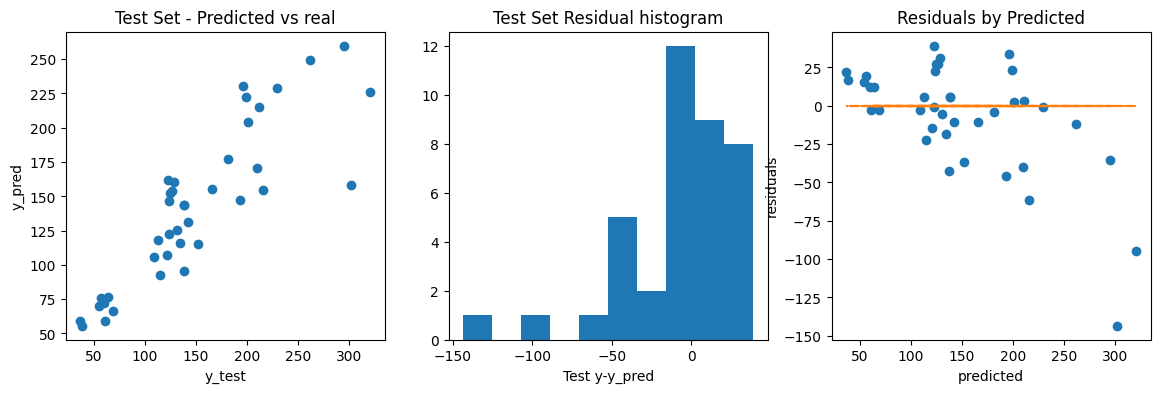

In [18]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [19]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

1305.4222470540894
23.928299731117843


In [20]:
R2=r2_score(y_test,y_pred)
R2

0.5847681434542746

#### Cross validation

In [21]:
scores=cross_val_score(model, X_train_scaled, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.09


## income composition of resources by life expectancy
### income composition of resources = Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

#### Defining X, y

In [22]:
X = who_numericals['life expectancy'].to_frame()

In [23]:
y = who_numericals['income composition of resources'].to_frame()

#### Data splitting

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#### Data scaling

In [25]:
std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [26]:
X_test_scaled=std_scaler.transform(X_test)

#### Model fitting

In [29]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Model prediction

In [30]:
y_pred=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

#### Model evaluation

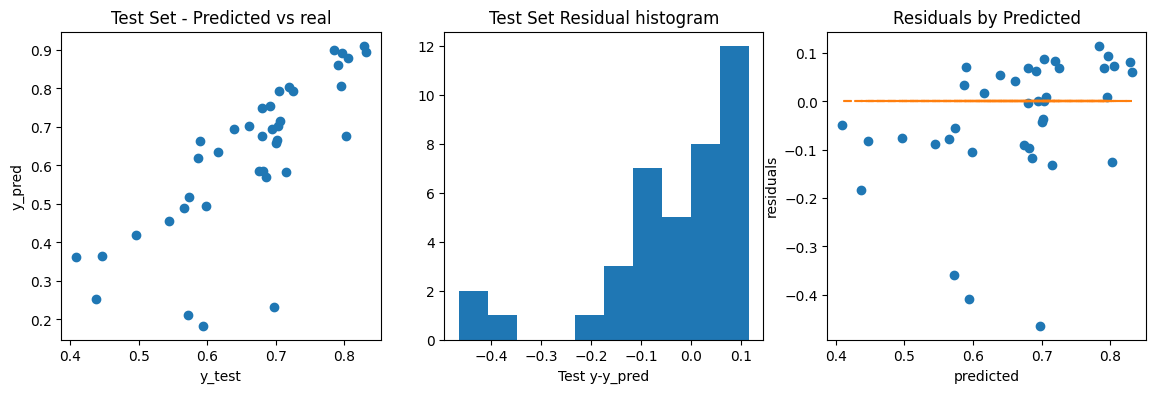

In [31]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [32]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

0.018968846996540705
0.09495537975620966


In [33]:
R2=r2_score(y_test,y_pred)
R2

0.5169284801404246

#### Cross validation

In [34]:
scores=cross_val_score(model, X_train_scaled, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.09


## schooling by life expectancy
### schooling = Number of years of Schooling(years) 

#### Defining X, y

In [35]:
X = who_numericals['life expectancy'].to_frame()

y = who_numericals['schooling'].to_frame()

#### Data splitting

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)


#### Data scaling

In [37]:
std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [38]:
X_test_scaled=std_scaler.transform(X_test)


#### Model fitting

In [39]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Model prediction

In [42]:
y_pred=model2.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

NameError: name 'model2' is not defined

#### Model evaluation

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics


In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
R2=r2_score(y_test,y_pred)
R2

#### Cross validation

In [ ]:
scores=cross_val_score(model, X_train_scaled, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

## schooling by income composition of resources
### schooling = Number of years of Schooling(years)
### income composition of resources = Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
 


#### Defining X, y

In [43]:
X = who_numericals['income composition of resources'].to_frame()

y = who_numericals['schooling'].to_frame()

#### Data splitting

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)



#### Data scaling

In [45]:
std_scaler=StandardScaler().fit(X_train) 

In [46]:
X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)


#### Model fitting

In [47]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Model prediction


In [48]:
y_pred=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)



#### Model evaluation

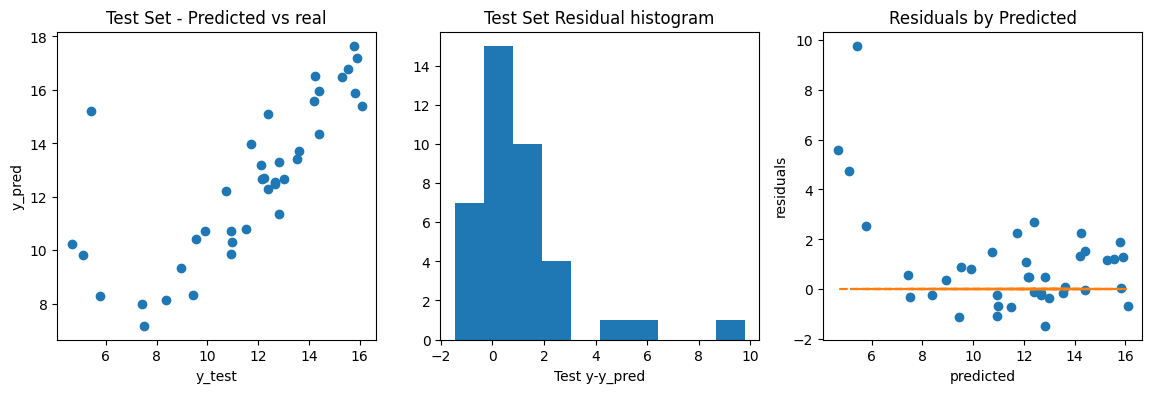

In [49]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


#### Error metrics

In [50]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

R2=r2_score(y_test,y_pred)
R2

5.061657048318744
1.3484751012882394


0.37339145822114683


#### Cross validation

In [51]:
scores=cross_val_score(model, X_train_scaled, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.65 accuracy with a standard deviation of 0.16


 ## income composition of resources by schooling
 ### income composition of resources = Human Development Index in terms of income composition of resources (index ranging from 0 to 1)


#### Defining X, y

In [52]:
X = who_numericals['schooling'].to_frame()

y = who_numericals['income composition of resources'].to_frame()

#### Data splitting

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#### Data scaling


In [55]:
std_scaler=StandardScaler().fit(X_train) 

In [56]:
X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

#### Model fitting

In [57]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Model prediction

In [58]:
y_pred=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

#### Model evaluation

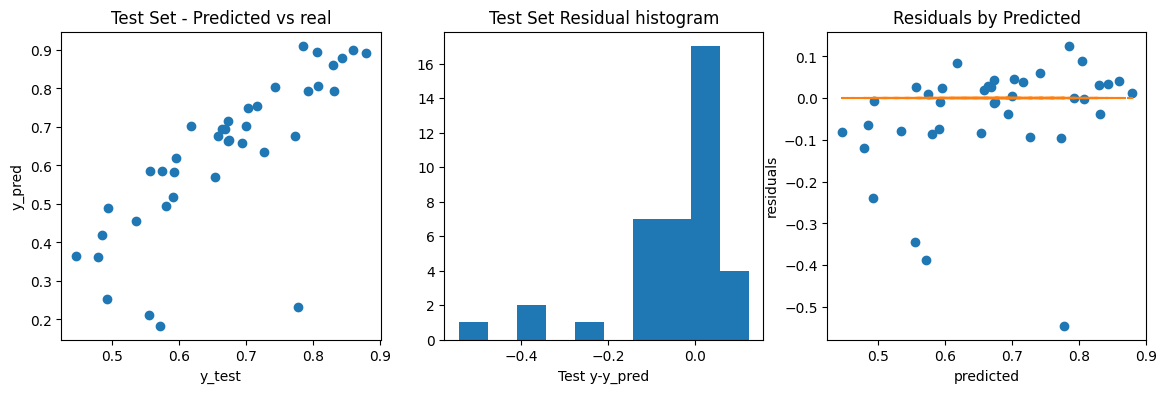

In [59]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


#### Error metrics

In [60]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

R2=r2_score(y_test,y_pred)
R2

0.019040201495077378
0.08082604286868313


0.5151113256205313

#### Cross validation

In [61]:
scores=cross_val_score(model, X_train_scaled, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.21


## adult mortality by schooling
### adult mortality = probability of dying between 15 and 60 years per 1000 population

#### Defining X, y

In [62]:
X = who_numericals['schooling'].to_frame()

y = who_numericals['adult mortality'].to_frame()


#### Data splitting

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#### Data scaling

In [64]:
std_scaler=StandardScaler().fit(X_train) 


In [65]:
X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

#### Model fitting

In [66]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Model prediction

In [67]:
y_pred=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

#### Model evaluation

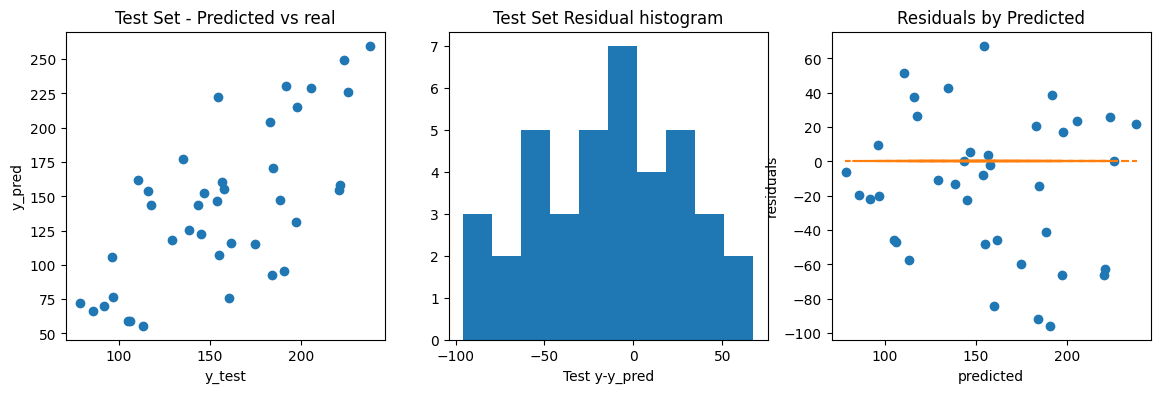

In [68]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')




#### Error metrics

In [69]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

R2=r2_score(y_test,y_pred)
R2

1848.5197406800498
34.43669665514693


0.4120183829284807

#### Cross validation

In [70]:
scores=cross_val_score(model, X_train_scaled, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.15 accuracy with a standard deviation of 0.25


## diphtheria by polio
### comorbidity = how often diseases coincide w/ one another

#### Defining X, y

In [71]:
X = who_numericals['polio'].to_frame()

y = who_numericals['diphtheria'].to_frame()

#### Data splitting

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#### Data scaling

In [73]:
std_scaler=StandardScaler().fit(X_train) 

In [74]:
X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

#### Model fitting


In [75]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Model prediction

In [76]:
y_pred=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

#### Model evaluation

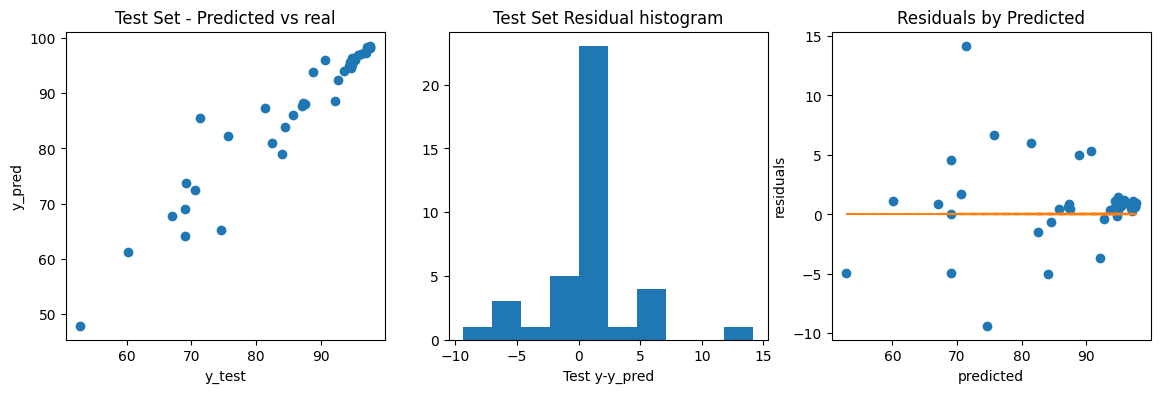

In [77]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [78]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

R2=r2_score(y_test,y_pred)
R2


14.141177905229894
2.3217019561229217


0.9107664987731032

#### Cross validation

In [79]:
scores=cross_val_score(model, X_train_scaled, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.06


# Visualizing Power Law Distributions

## percentage expenditure by life expectancy
### percentage expenditure = Expenditure on health as a percentage of Gross Domestic Product per capita(%)

In [88]:
who.columns

Index(['country', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

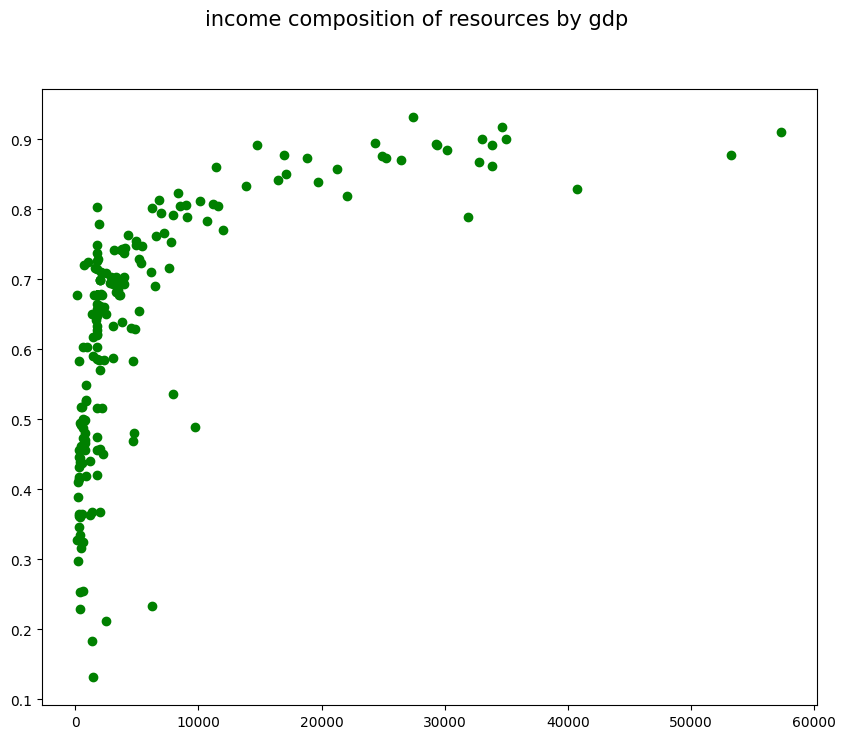

In [95]:
fig, axes = plt.subplots(1,figsize = (10,8))

fig.suptitle('income composition of resources by gdp', fontsize=15)

axes.scatter(who['gdp'], who['income composition of resources'], c='green', label='y = 2^x')

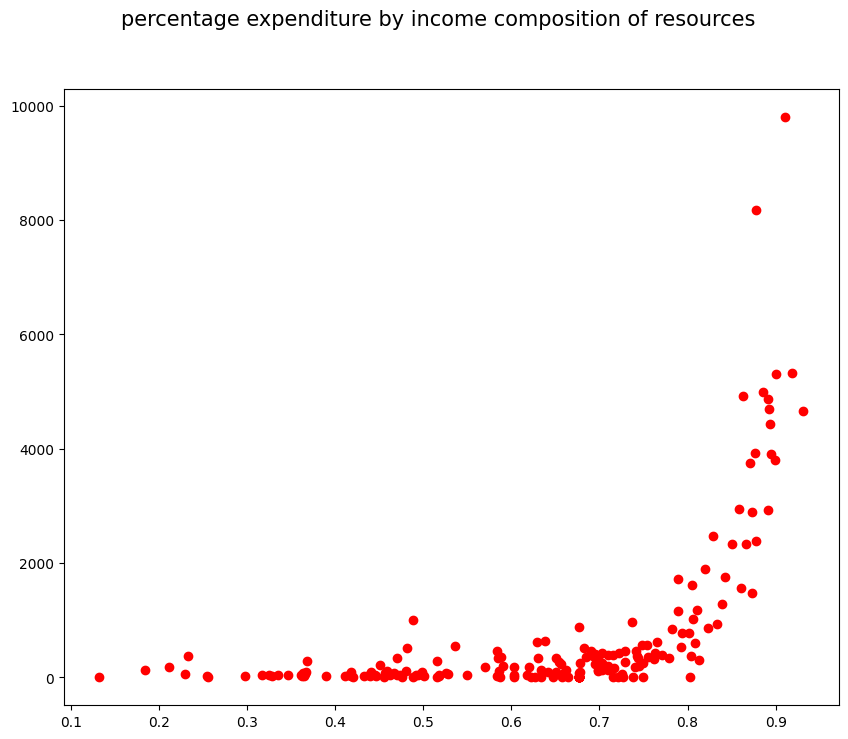

In [97]:
fig, axes = plt.subplots(1,figsize = (10,8))

fig.suptitle('percentage expenditure by income composition of resources', fontsize=15)

axes.scatter(who['income composition of resources'], who['percentage expenditure'], c='red', label='y = 2^x')

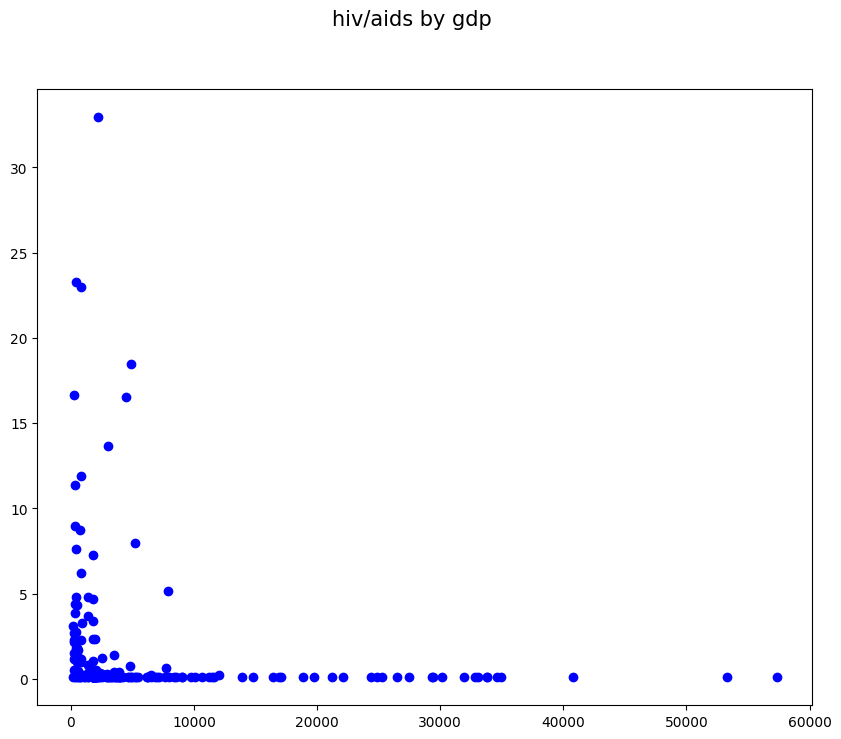

In [96]:
fig, axes = plt.subplots(1,figsize = (10,8))

fig.suptitle('hiv/aids by gdp', fontsize=15)

axes.scatter(who['gdp'], who['hiv/aids'], c='blue', label='y = 2^x')